# 영화 리뷰 분류: 이진 분류 예제

## 추가 실험

* 교재의 예제에서는 두 개의 은닉층을 사용했습니다. 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.
* 층의 은닉 유닛을 추가하거나 줄여 보세요: 32개 유닛, 64개 유닛 등
* `binary_crossentropy` 대신에 `mse` 손실 함수를 사용해 보세요.
* `relu` 대신에 `tanh` 활성화 함수(초창기 신경망에서 인기 있었던 함수입니다)를 사용해 보세요.

다음 실험을 진행하면 여기에서 선택한 구조가 향상의 여지는 있지만 어느 정도 납득할 만한 수준이라는 것을 알게 것입니다!

<i>충분히 납득합니다... 추가 문제에서 내가 선택한 구조는 결과가 너무 잘 안나옴 (구조 선택할 때 뭐가 좋은지 아직 잘 모르겠음)</i>

In [1]:
import keras
keras.__version__

C:\Users\leehyunjoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [16]:
# 직접 원-핫 벡터로 만들기
# 원-핫 벡터 == 이진 행렬 (이진법처럼 0과1로만 이루어진 행렬이니까)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results


# 훈련 데이터 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터로 변환
x_test = vectorize_sequences(test_data)

# 훈련 레이블 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
# 테스트 레이블 벡터로 변환
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['acc'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# val = validation = 검증

# x_train과 y_train을 훈련 검증 세트 라고 한다.

In [28]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=10,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 142us/step - loss: 0.0166 - acc: 0.9813 - val_loss: 0.1108 - val_acc: 0.8728
Epoch 2/10
15000/15000 [==============================] - 2s 134us/step - loss: 0.0168 - acc: 0.9813 - val_loss: 0.1119 - val_acc: 0.8742
Epoch 3/10
15000/15000 [==============================] - 2s 133us/step - loss: 0.0102 - acc: 0.9889 - val_loss: 0.1286 - val_acc: 0.8550
Epoch 4/10
15000/15000 [==============================] - 2s 134us/step - loss: 0.0095 - acc: 0.9901 - val_loss: 0.1402 - val_acc: 0.8466
Epoch 5/10
15000/15000 [==============================] - 2s 133us/step - loss: 0.0166 - acc: 0.9811 - val_loss: 0.1164 - val_acc: 0.8710
Epoch 6/10
15000/15000 [==============================] - 2s 133us/step - loss: 0.0109 - acc: 0.9875 - val_loss: 0.1172 - val_acc: 0.8690
Epoch 7/10
15000/15000 [==============================] - 2s 131us/step - loss: 0.0070 - acc: 0.9929 - val_loss: 0.1218 - 

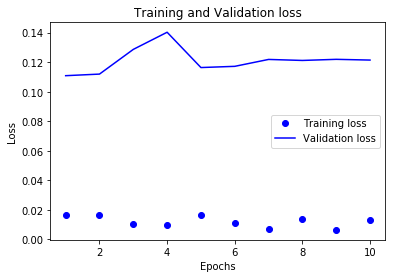

In [29]:
# loss : 훈련 손실, 검증 손실 그래프 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1 ) # len(loss) == 10

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

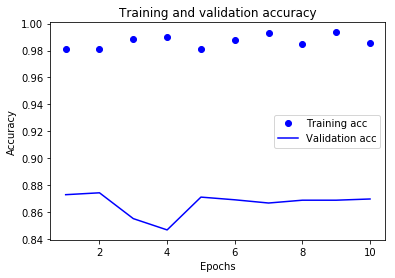

In [30]:
# 일단 그래프 초기화
plt.clf()

# accuracy : 훈련 정확도, 검증 정확도 그리기

# import matplotlib.pyplot as plt
# history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']

# epochs = range(1, len(loss) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()